Imports

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Read Data

In [30]:
file = pd.ExcelFile("../../../../data/final/Handball_09.03.2023_fertig.xlsx")

file.sheet_names

df = file.parse('3. League')

# drop last col comments & favorite corner & empy rows at end
df = df.iloc[:, :-2]
df.columns


Index(['Home team', 'Guest team', 'Matchday', 'Player 3rd league',
       'Shooter team', 'club region', 'Game Minute',
       'Difference between\nfinal whistle and kickoff \n(in seconds)',
       'Home Goal', 'Guest Goal',
       'Goalkeeper position\n(0 = on the line;\n 1 = in front of the line)',
       'Toss successful?\n(0 = no; 1 = yes;\n 2 = yes, afterthrow',
       'Left/right \nhanded?\n(1 = right; 2 = left)', 'Throw direction',
       'Pressure situation?\n(0 = no; \n1= Goalkeeper change;\n2 = last 7 meter held; 3 = goal difference < 4 + from 50. minute; 4 = 1+2; 5 = 1+3; 6 = 2+3; 7 = 1+2+3; 8 = last 7 meter successful in follow-up throw\n',
       'Number of seven meters\n(of the player)',
       'Throw quadrant last 7 meter',
       'last 7 meter successful?\n(0 = no; 1 = yes; \n2 = yes, in the afterthrow'],
      dtype='object')

Cleanup & Renaming

In [31]:
df.replace('unklar', np.nan,inplace=True)
df.replace('unklar ', np.nan,inplace=True)
df.replace('fehlend', np.nan,inplace=True)
df.replace('-', np.nan,inplace=True)
df.replace(-99, np.nan,inplace=True)
df.replace('-99', np.nan,inplace=True)
df.replace('?', np.nan,inplace=True)
df.replace('?!', np.nan,inplace=True)
#df.dropna(inplace=True)
df.columns = [ 'homeTeam','opponentTeam','day','name','team','region','playTime',
              'whistleThrowTime','homeGoals','opponentGoals',
              'goalKeeperPosition',
              'throwSuccess','LRHandy','throwDirection',
              'pressureSituation','noOfThrowsFromPlayer',
              'throwQuadrantLastThrow','lastThrowSuccess']
df = df.astype({'homeTeam':'string', 'opponentTeam':'string','day':'float16','name':'string','team':'string','region':'string','playTime':'float16',
              'whistleThrowTime':'float16','homeGoals':'float16','opponentGoals':'float16','goalKeeperPosition':'float16',
              'throwSuccess':'float16','LRHandy':'float16','throwDirection':'float16','pressureSituation':'float16','noOfThrowsFromPlayer':'float16',
              'throwQuadrantLastThrow':'float16','lastThrowSuccess':'float16', })
df

,homeTeam,opponentTeam,day,name,team,region,playTime,whistleThrowTime,homeGoals,opponentGoals,goalKeeperPosition,throwSuccess,LRHandy,throwDirection,pressureSituation,noOfThrowsFromPlayer,throwQuadrantLastThrow,lastThrowSuccess
0,TV Emsdetten,ASV Hamm-Westfalen II,1.0,<NA>,<NA>,west,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HLZ Ahlener SG,TV Emsdetten,2.0,<NA>,<NA>,west,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TV Emsdetten,VfL Gladbeck,3.0,Holzner,TV Emsdetten,west,2.0,23.0,0.0,0.0,1.0,1.0,1.0,8.0,0.0,1.0,NaN,1.0
3,TV Emsdetten,VfL Gladbeck,3.0,Holzner,TV Emsdetten,west,7.0,16.0,5.0,1.0,1.0,1.0,1.0,3.0,0.0,2.0,8.0,1.0
4,TV Emsdetten,VfL Gladbeck,3.0,Holzner,TV Emsdetten,west,31.0,28.0,19.0,9.0,1.0,1.0,1.0,7.0,0.0,3.0,3.0,1.0
5,TV Emsdetten,VfL Gladbeck,3.0,Holzner,TV Emsdetten,west,51.0,22.0,31.0,20.0,1.0,1.0,1.0,1.0,0.0,4.0,7.0,1.0
6,TV Emsdetten,VfL Gladbeck,3.0,Holzner,TV Emsdetten,west,54.0,31.0,35.0,22.0,1.0,1.0,1.0,3.0,0.0,5.0,1.0,1.0
7,TSV GWD Minden II,TV Emsdetten,4.0,Holzner,TV Emsdetten,west,2.0,15.0,0.0,0.0,1.0,0.0,1.0,7.0,0.0,1.0,NaN,NaN
8,TSV GWD Minden II,TV Emsdetten,4.0,Holzner,TV Emsdetten,west,8.0,20.0,1.0,3.0,1.0,2.0,1.0,7.0,2.0,2.0,7.0,0.0
9,TSV GWD Minden II,TV Emsdetten,4.0,Terhaer,TV Emsdetten,west,27.0,27.0,5.0,12.0,1.0,1.0,2.0,7.0,0.0,1.0,NaN,NaN


In [32]:
df = df.loc[:,('name','throwDirection','throwSuccess')].copy()
df.dropna(inplace=True)
df['throwSuccess'].replace(2.0, 1.0,inplace=True)


'''plys = ['Bergold', 'Bremond', 'Brüren', 'Buck', 'Djozic', 'Friedmann',
       'Fröhlich', 'Grosser', 'Götz', 'Hannes', 'Holzner', 'Häufglöckner',
       'Keller', 'Kerst', 'Klasmann', 'Kolodziej', 'Kwiatowski', 'Lux',
       'Malolepszy', 'Mocken', 'Mundus', 'Noll', 'Paraschiv', 'Pauli',
       'Schliedermann', 'Schulz', 'Serwinski', 'Skroblien', 'von Hermanni']'''
plys = ['Bergold', 'Buck','Holzner', 'Kolodziej', 'Pauli']
df = df[df.name.isin(plys) == True]


#df1 =pd.crosstab(df['name'], df['throwDirection'], margins=True, margins_name="Total") 
df1 =pd.crosstab(df['name'], df['throwDirection'],margins=True, margins_name="Total") 
df1 = df1.loc[df1['Total'] >=10]
df1.index[:-1]

Index(['Bergold', 'Buck', 'Holzner', 'Kolodziej', 'Pauli'], dtype='object', name='name')

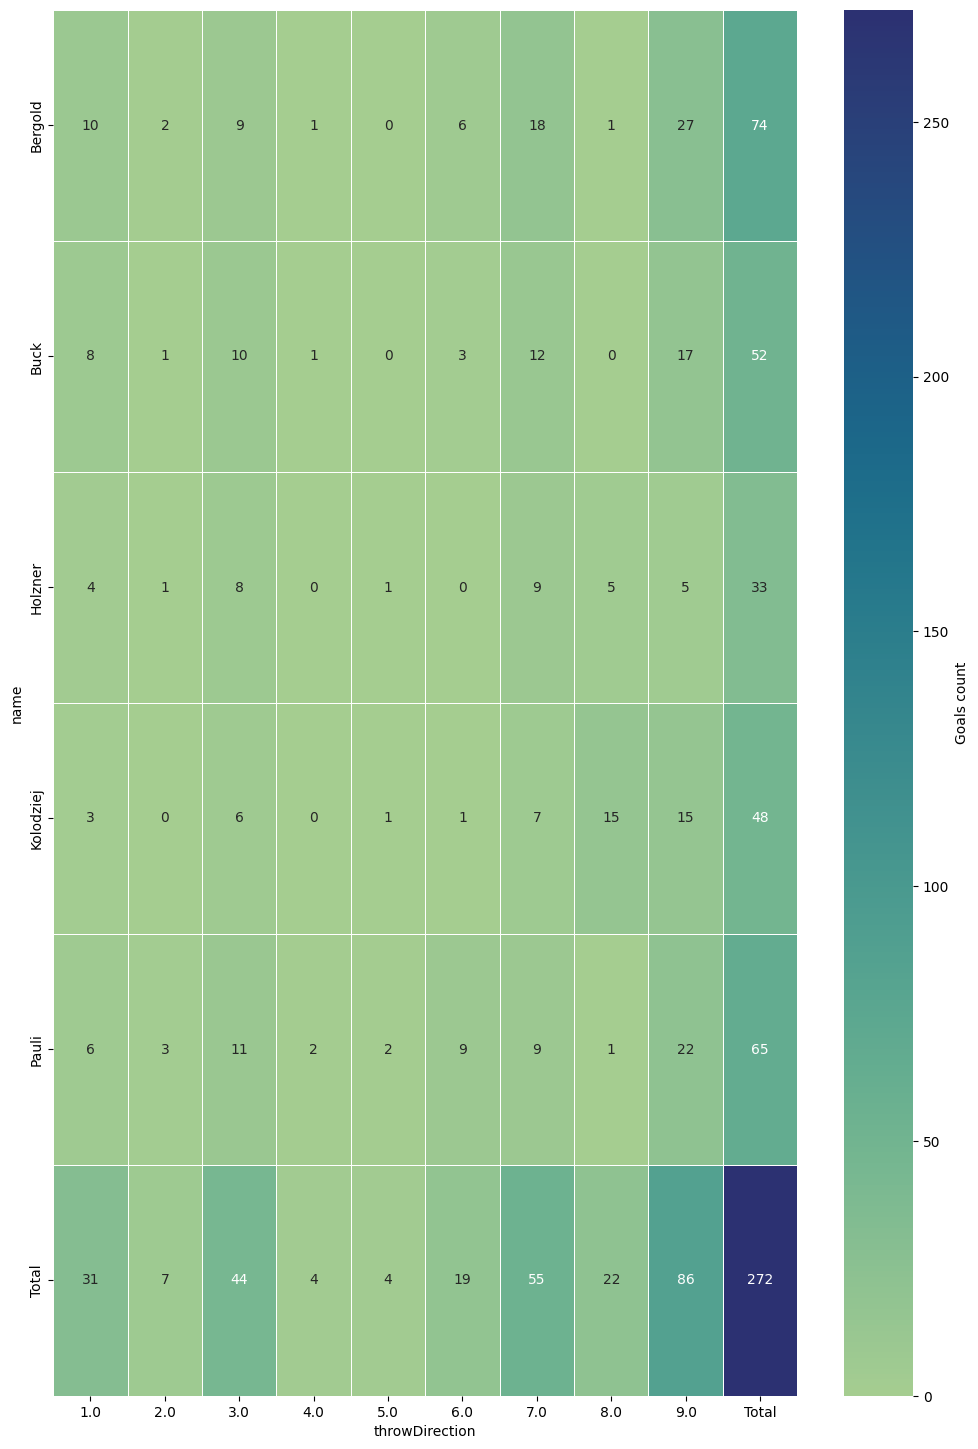

In [33]:
figab, axab = plt.subplots(figsize=(12,18)) 
sns.heatmap(df1, linewidth=0.5, ax=axab, annot=True, cmap="crest",fmt='.3g',cbar_kws={'label': 'Goals count'})
#ax.xaxis.tick_top()
plt.show()

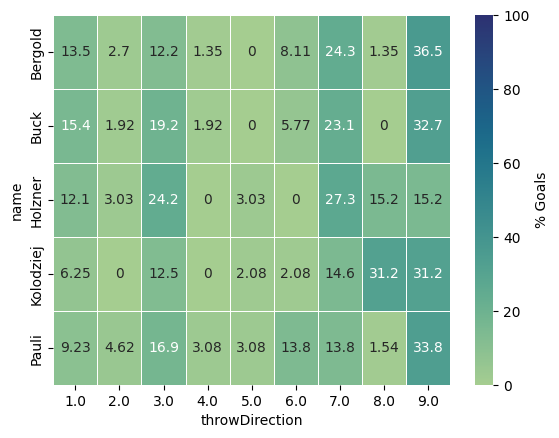

In [43]:
fig, ax = plt.subplots() 
filtered = df.loc[df['name'].isin(df1.index[:-1])]
sns.heatmap(pd.crosstab( filtered['name'], filtered['throwDirection'], normalize='index')*100, linewidth=0.5, ax=ax, annot=True, cmap="crest",vmin=0,vmax=100,fmt='.3g',cbar_kws={'label': '% Goals'})
#sns.heatmap(pd.crosstab( df['name'], df['throwDirection'], normalize='index')*100, linewidth=0.5, ax=ax, annot=True, cmap="crest",vmin=0,vmax=100,fmt='.3g',cbar_kws={'label': '% Goals'})

#ax.xaxis.tick_top()
plt.show()

In [35]:
df2 =pd.crosstab(df['name'], df['throwSuccess']) 
pd.set_option("display.max_rows", None, "display.max_columns", None)
df2

throwSuccess,0.0,1.0
name,,
Bergold,16,58
Buck,9,43
Holzner,4,29
Kolodziej,4,44
Pauli,9,56


In [36]:
df3 = pd.crosstab([df['name'],df['throwDirection']], df['throwSuccess']) 
#pd.set_option("display.max_rows", None, "display.max_columns", None)
df3

throwSuccess              0.0  1.0
name      throwDirection          
Bergold   1.0               5    5
          2.0               1    1
          3.0               2    7
          4.0               0    1
          6.0               0    6
          7.0               2   16
          8.0               0    1
          9.0               6   21
Buck      1.0               2    6
          2.0               0    1
          3.0               4    6
          4.0               0    1
          6.0               0    3
          7.0               2   10
          9.0               1   16
Holzner   1.0               0    4
          2.0               1    0
          3.0               0    8
          5.0               1    0
          7.0               1    8
          8.0               0    5
          9.0               1    4
Kolodziej 1.0               1    2
          3.0               1    5
          5.0               0    1
          6.0               0    1
          7.0               1    6
          8.0               1   14
          9.0               0   15
Pauli     1.0               0    6
          2.0               0    3
          3.0               1   10
          4.0               1    1
          5.0               0    2
          6.0               1    8
          7.0               2    7
          8.0               0    1
          9.0               4   18

In [37]:
df3 = pd.crosstab([df['name'],df['throwDirection']], df['throwSuccess']) 
#pd.set_option("display.max_rows", None, "display.max_columns", None)
df3

throwSuccess              0.0  1.0
name      throwDirection          
Bergold   1.0               5    5
          2.0               1    1
          3.0               2    7
          4.0               0    1
          6.0               0    6
          7.0               2   16
          8.0               0    1
          9.0               6   21
Buck      1.0               2    6
          2.0               0    1
          3.0               4    6
          4.0               0    1
          6.0               0    3
          7.0               2   10
          9.0               1   16
Holzner   1.0               0    4
          2.0               1    0
          3.0               0    8
          5.0               1    0
          7.0               1    8
          8.0               0    5
          9.0               1    4
Kolodziej 1.0               1    2
          3.0               1    5
          5.0               0    1
          6.0               0    1
          7.0               1    6
          8.0               1   14
          9.0               0   15
Pauli     1.0               0    6
          2.0               0    3
          3.0               1   10
          4.0               1    1
          5.0               0    2
          6.0               1    8
          7.0               2    7
          8.0               0    1
          9.0               4   18

Playerwise Successfull Throw

In [38]:
dfs = df.loc[df['throwSuccess'] == 1]
dfs
dfscs =pd.crosstab(dfs['name'], dfs['throwDirection'], margins=True, margins_name="Total") 
dfscs

throwDirection,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,Total
name,,,,,,,,,,
Bergold,5,1,7,1,0,6,16,1,21,58
Buck,6,1,6,1,0,3,10,0,16,43
Holzner,4,0,8,0,0,0,8,5,4,29
Kolodziej,2,0,5,0,1,1,6,14,15,44
Pauli,6,3,10,1,2,8,7,1,18,56
Total,23,5,36,3,3,18,47,21,74,230


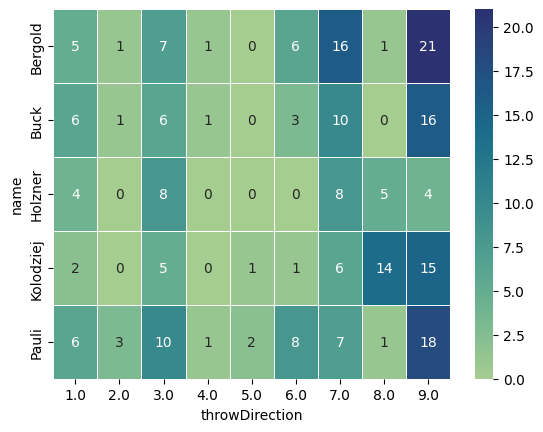

In [39]:
axs = sns.heatmap(pd.crosstab(dfs['name'], dfs['throwDirection']), linewidth=0.5, annot=True, cmap="crest")
#ax.xaxis.tick_top()
plt.show()

Playerwise Failed Throws

In [40]:
dff = df.loc[df['throwSuccess'] == 0]
dff
dffcs =pd.crosstab(dff['name'], dff['throwDirection'], margins=True, margins_name="Total") 
dffcs

throwDirection,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,Total
name,,,,,,,,,,
Bergold,5,1,2,0,0,0,2,0,6,16
Buck,2,0,4,0,0,0,2,0,1,9
Holzner,0,1,0,0,1,0,1,0,1,4
Kolodziej,1,0,1,0,0,0,1,1,0,4
Pauli,0,0,1,1,0,1,2,0,4,9
Total,8,2,8,1,1,1,8,1,12,42


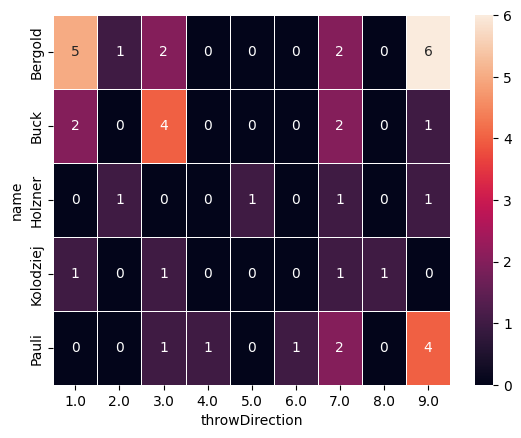

In [41]:
axf = sns.heatmap(pd.crosstab(dff['name'], dff['throwDirection']), linewidth=0.5, annot=True)
#ax.xaxis.tick_top()
plt.show()

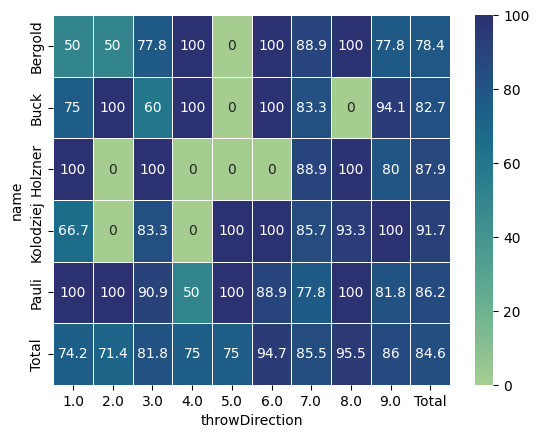

throwDirection,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,Total
name,,,,,,,,,,
Bergold,50.000000,50.000000,77.777778,100.0,0.0,100.000000,88.888889,100.000000,77.777778,78.378378
Buck,75.000000,100.000000,60.000000,100.0,0.0,100.000000,83.333333,0.000000,94.117647,82.692308
Holzner,100.000000,0.000000,100.000000,0.0,0.0,0.000000,88.888889,100.000000,80.000000,87.878788
Kolodziej,66.666667,0.000000,83.333333,0.0,100.0,100.000000,85.714286,93.333333,100.000000,91.666667
Pauli,100.000000,100.000000,90.909091,50.0,100.0,88.888889,77.777778,100.000000,81.818182,86.153846
Total,74.193548,71.428571,81.818182,75.0,75.0,94.736842,85.454545,95.454545,86.046512,84.558824


In [42]:
relSuccess = dfscs/df1*100
relSuccess.apply(np.floor)
relSuccess.replace(np.nan,0,inplace=True)
axrs = sns.heatmap(relSuccess, linewidth=0.5, annot=True, cmap="crest",fmt='.3g')
#ax.xaxis.tick_top()
plt.show()
relSuccess